In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
boston = datasets.load_boston()
print(boston.DESCR)
x = boston.data[:,5]
y = boston.target
print(boston.data)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

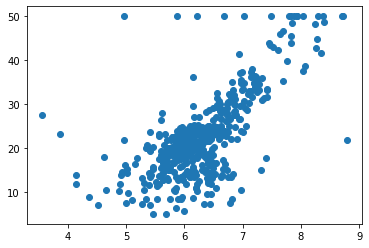

In [3]:
plt.scatter(x,y)
plt.show()

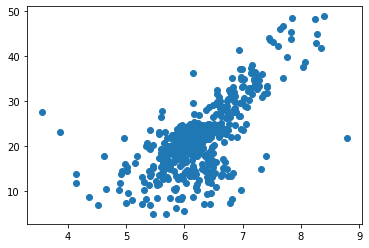

In [4]:
x = x[y < 50.0]
y = y[y < 50.0]

plt.scatter(x,y)
plt.show()

In [5]:
X = boston.data
y = boston.target
X = X[y < 50.0]
y = y[y < 50.0]
X.shape

(490, 13)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
y_train.shape

(367,)

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression()

In [8]:
y_0_hat = lin_reg.predict(X_test[0].reshape(1,-1))
print(y_0_hat)
print(y_test[0])
print(lin_reg.coef_)
print(lin_reg.intercept_)
print(lin_reg.score(X_test,y_test))

[32.56769948]
37.3
[-9.79441755e-02  3.99116709e-02 -7.68378559e-02  1.11984784e+00
 -1.44145201e+01  2.69504996e+00 -2.69175409e-02 -1.38189185e+00
  2.24483284e-01 -1.04673679e-02 -8.82997426e-01  6.75761395e-03
 -3.67920222e-01]
41.48715127265325
0.7950669624698461


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg',LinearRegression())
])
poly_reg.fit(X_train,y_train)
poly_reg.score(X_test,y_test)

0.7120221908562548